#1 Loading the Dataset and  then extract all of the rows which have minimum or maximum temperatures.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('temperature.csv')

In [5]:
minimum = []
maximum = []
df = df[~(df['Date'].str.endswith(r'02-29'))]
times = pd.DatetimeIndex(df['Date'])
df1 = df[times.year != 2015]
times1 = pd.DatetimeIndex(df1['Date'])
for j in df1.groupby([times1.month, times1.day]):
      minimum.append(min(j[1]['Data_Value']))
      maximum.append(max(j[1]['Data_Value']))

In [6]:
df1.max()


ID            USW00094889
Date           2014-12-31
Element              TMIN
Data_Value            406
dtype: object

In [7]:
df.max()

ID            USW00094889
Date           2015-12-31
Element              TMIN
Data_Value            406
dtype: object

In [8]:
df2015 = df[times.year == 2015]
times2015 = pd.DatetimeIndex(df2015['Date'])
minimum2015 = []
maximum2015= []
for j in df2015.groupby([times2015.month, times2015.day]):
      minimum2015.append(min(j[1]['Data_Value']))
      maximum2015.append(max(j[1]['Data_Value']))

In [9]:
minaxis = []
maxaxis = []
minvals = []
maxvals = []
for i in range(len(minimum)):
      if((minimum[i] - minimum2015[i]) > 0):
          minaxis.append(i)
          minvals.append(minimum2015[i]) 
      if((maximum[i] - maximum2015[i]) < 0):
          maxaxis.append(i)
          maxvals.append(maximum2015[i])

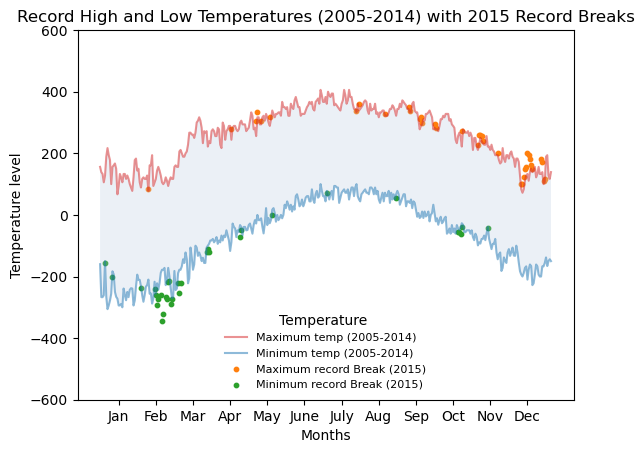

In [27]:
plt.figure()
plt.plot(maximum, c='#D62728', alpha=0.5, label= 'Maximum temp (2005-2014)')
plt.plot(minimum, c='#1F77B4', alpha=0.5, label= 'Minimum temp (2005-2014)')
plt.scatter(maxaxis, maxvals, s=10, c='#FF7F0E', label='Maximum record Break (2015)')
plt.scatter(minaxis, minvals, s=10, c='#2CA02C', label='Minimum record Break (2015)')
plt.gca().fill_between(range(len(minimum)), minimum, maximum, facecolor= '#B0C4DE', alpha=0.25)
plt.ylim(-600, 600)
plt.legend(loc= 8, frameon= False, title= 'Temperature ', fontsize=8)
plt.xticks(np.linspace(15,15 + 30*11, num= 12), (r'Jan', r'Feb', r'Mar', r'Apr', r'May', r'June', r'July', r'Aug', r'Sep', r'Oct', r'Nov', r'Dec',))
plt.xlabel('Months')
plt.ylabel('Temperature level')
plt.title('Record High and Low Temperatures (2005-2014) with 2015 Record Breaks')
plt.show()
